<a href="https://colab.research.google.com/github/Shivabairy005/Machine-Learning-Lab/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , accuracy_score, confusion_matrix, classification_report , confusion_matrix , precision_score , recall_score , f1_score

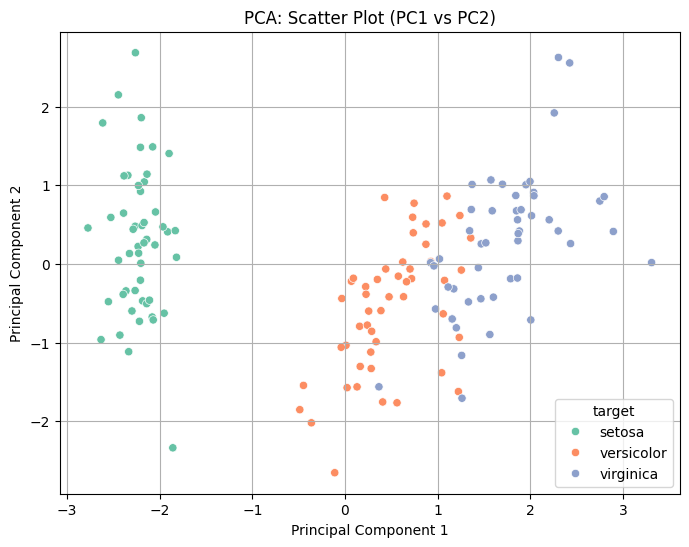

PCA Loadings (Variable Contributions):

                   PC1       PC2
sepal_length  0.521066  0.377418
sepal_width  -0.269347  0.923296
petal_length  0.580413  0.024492
petal_width   0.564857  0.066942

Variance explained by each PC:
 [0.72962445 0.22850762 0.03668922 0.00517871]

PC1 explains 72.96% variance
PC2 explains 22.85% variance


In [22]:
df = sns.load_dataset("iris").dropna()

X = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df["target"] = df.iloc[:, -1] if "species" in df.columns else None

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette="Set2")
plt.title("PCA: Scatter Plot (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(len(X.columns))],
                        index=X.columns)

print("PCA Loadings (Variable Contributions):\n")
print(loadings.iloc[:, :2])

explained_var = pca.explained_variance_ratio_
print("\nVariance explained by each PC:\n", explained_var)
print(f"\nPC1 explains {explained_var[0]*100:.2f}% variance")
print(f"PC2 explains {explained_var[1]*100:.2f}% variance")



Number of Principal Components explaining >80% variance: 2


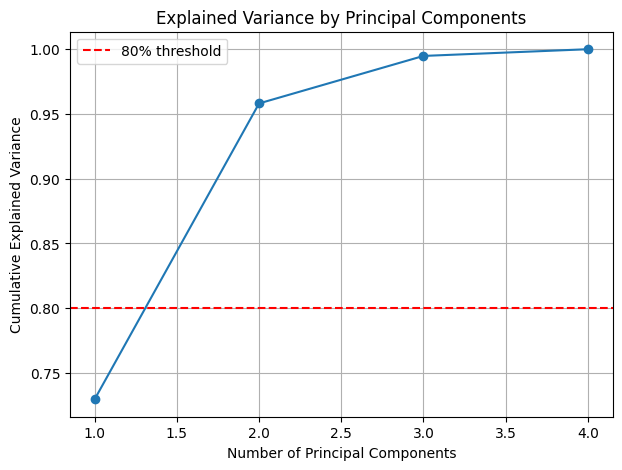

In [23]:
cumulative_var = np.cumsum(explained_var)
num_components_80 = np.argmax(cumulative_var >= 0.80) + 1

print(f"\nNumber of Principal Components explaining >80% variance: {num_components_80}")
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()


Intercept: 62854.086083450005
Slope: 82.380051024607

Interpretation: For each additional square foot, the price increases by approximately 82.38 units.

Mean Squared Error (MSE): 103453560.4330492
Mean Absolute Error (MAE): 9165.08929306225
Root Mean Squared Error (RMSE): 10171.212338411247


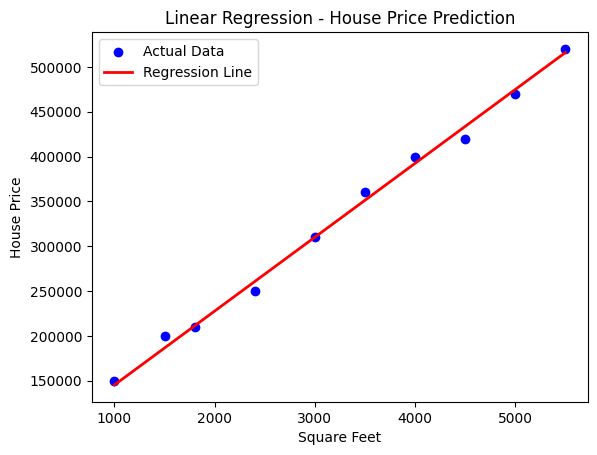

In [9]:
data = {
    'SquareFeet': [1000, 1500, 1800, 2400, 3000, 3500, 4000, 4500, 5000, 5500],
    'Price': [150000, 200000, 210000, 250000, 310000, 360000, 400000, 420000, 470000, 520000]
}
df = pd.DataFrame(data)

X = df[['SquareFeet']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"\nInterpretation: For each additional square foot, the price increases by approximately {slope:.2f} units.")

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Square Feet')
plt.ylabel('House Price')
plt.title('Linear Regression - House Price Prediction')
plt.legend()
plt.show()


Intercept: 25321.583011776813
Slope: 9423.815323030976

Interpretation: For each additional year of experience, the salary increases by approximately 9423.82 units.

Mean Squared Error (MSE): 49830096.85590839
Mean Absolute Error (MAE): 6286.453830757749
Root Mean Squared Error (RMSE): 7059.04362190151


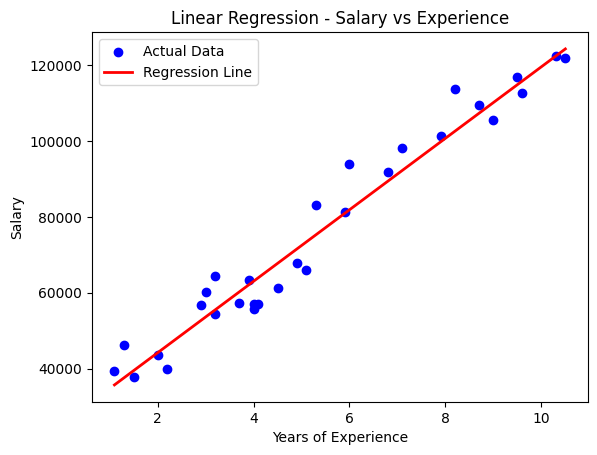

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_Data.csv")

X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"\nInterpretation: For each additional year of experience, the salary increases by approximately {slope:.2f} units.")

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression - Salary vs Experience')
plt.legend()
plt.show()

In [11]:
data1 = {
    'Age': [25, 30, 35, 40, 28, 32, 45, 50, 38, 42],
    'Height': [165, 170, 172, 180, 168, 175, 178, 182, 169, 176],
    'Weight': [70, 80, 85, 90, 75, 88, 95, 100, 85, 92],
    'TimeOnExercise': [30, 45, 50, 60, 40, 55, 70, 80, 60, 75],
    'WeightReduction': [3, 5, 6, 7, 4, 6, 8, 10, 7, 9]
}

df1 = pd.DataFrame(data1)

X1 = df1[['Age', 'Height', 'Weight', 'TimeOnExercise']]
y1 = df1['WeightReduction']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

y1_pred = model1.predict(X1_test)

print("Weight Reduction Prediction")
print("-----------------------------")
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)
print("\nInterpretation:")
for col, coef in zip(X1.columns, model1.coef_):
    print(f"For each unit increase in {col}, weight reduction changes by {coef:.2f} units.")

mse1 = mean_squared_error(y1_test, y1_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)

print(f"\nMSE: {mse1}")
print(f"MAE: {mae1}")
print(f"RMSE: {rmse1}")
print("\n")


Weight Reduction Prediction
-----------------------------
Intercept: 1.3457224772036636
Coefficients: [ 0.05695721 -0.02178785  0.00500329  0.11360104]

Interpretation:
For each unit increase in Age, weight reduction changes by 0.06 units.
For each unit increase in Height, weight reduction changes by -0.02 units.
For each unit increase in Weight, weight reduction changes by 0.01 units.
For each unit increase in TimeOnExercise, weight reduction changes by 0.11 units.

MSE: 0.011810622527814733
MAE: 0.10323879427444727
RMSE: 0.10867668806057136




House Price Prediction
-----------------------
Intercept: 113017.10921705503
Coefficients: [  138.46507635  1408.90415159  1408.90415159 -4544.36744956]

Interpretation:
For each unit increase in Area, house price changes by 138.47 units.
For each unit increase in Bedrooms, house price changes by 1408.90 units.
For each unit increase in Bathrooms, house price changes by 1408.90 units.
For each unit increase in Age, house price changes by -4544.37 units.

MSE: 559438690.964505
MAE: 23504.62991346576
RMSE: 23652.456341033692


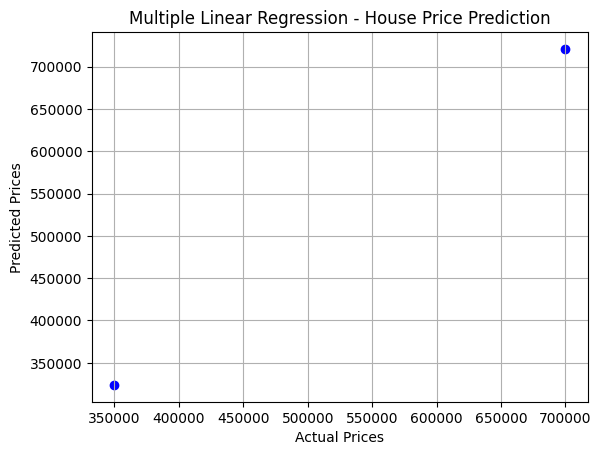

In [12]:
data2 = {
    'Area': [1500, 1800, 2400, 3000, 3500, 4000, 4200, 4800, 5000, 5500],
    'Bedrooms': [3, 3, 4, 4, 5, 5, 5, 6, 6, 7],
    'Bathrooms': [2, 2, 3, 3, 4, 4, 4, 5, 5, 6],
    'Age': [5, 10, 8, 12, 15, 20, 18, 25, 22, 30],
    'Price': [300000, 350000, 420000, 480000, 550000, 600000, 620000, 680000, 700000, 750000]
}

df2 = pd.DataFrame(data2)

X2 = df2[['Area', 'Bedrooms', 'Bathrooms', 'Age']]
y2 = df2['Price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

print("House Price Prediction")
print("-----------------------")
print("Intercept:", model2.intercept_)
print("Coefficients:", model2.coef_)
print("\nInterpretation:")
for col, coef in zip(X2.columns, model2.coef_):
    print(f"For each unit increase in {col}, house price changes by {coef:.2f} units.")

mse2 = mean_squared_error(y2_test, y2_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)

print(f"\nMSE: {mse2}")
print(f"MAE: {mae2}")
print(f"RMSE: {rmse2}")

plt.scatter(y2_test, y2_pred, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Linear Regression - House Price Prediction")
plt.grid(True)
plt.show()


Index(['YearsExperience', 'Salary'], dtype='object')


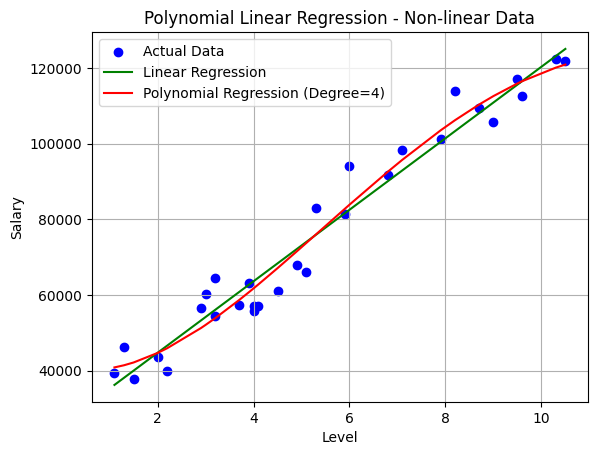

Intercept: 41164.74839110911
Coefficients: [    0.         -3314.24649881  2979.9121645   -236.58640162
     4.92429165]

MSE: 26403845.62388011
MAE: 4265.60894900844
RMSE: 5138.467244605156


In [17]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_Data.csv")
print(df.columns)
X = df[['YearsExperience']]
y = df['Salary']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

y_pred_linear = lin_reg.predict(X)
y_pred_poly = poly_reg.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_linear, color='green', label='Linear Regression')
plt.plot(X, y_pred_poly, color='red', label='Polynomial Regression (Degree=4)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Linear Regression - Non-linear Data')
plt.legend()
plt.grid(True)
plt.show()

print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)

mse = mean_squared_error(y, y_pred_poly)
mae = mean_absolute_error(y, y_pred_poly)
rmse = np.sqrt(mse)

print(f"\nMSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


Intercept: [-9.00675402]
Coefficients: [[ 0.06437262  0.03409503 -0.01387901  0.00329083 -0.00180346  0.10260651
   0.62671806  0.0370955 ]]

Accuracy: 74.68%

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



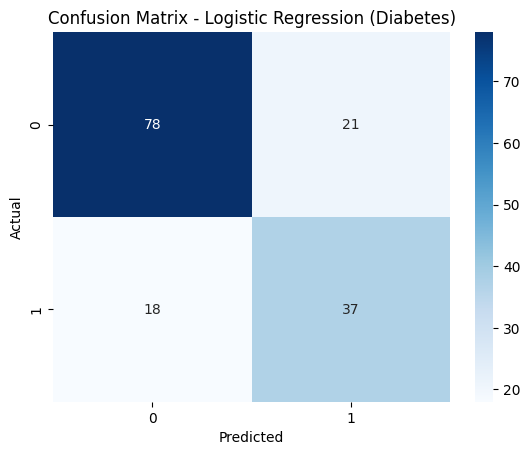

In [18]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print(f"\nAccuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Diabetes)")
plt.show()


Intercept: [-9.00675402]
Coefficients: [[ 0.06437262  0.03409503 -0.01387901  0.00329083 -0.00180346  0.10260651
   0.62671806  0.0370955 ]]

Confusion Matrix:
 [[78 21]
 [18 37]]

From sklearn metrics:
Accuracy: 0.7468
Precision: 0.6379
Recall: 0.6727
F1 Score: 0.6549

From manual formulas (using confusion matrix):
Accuracy: 0.7468
Precision: 0.6379
Recall: 0.6727
F1 Score: 0.6549


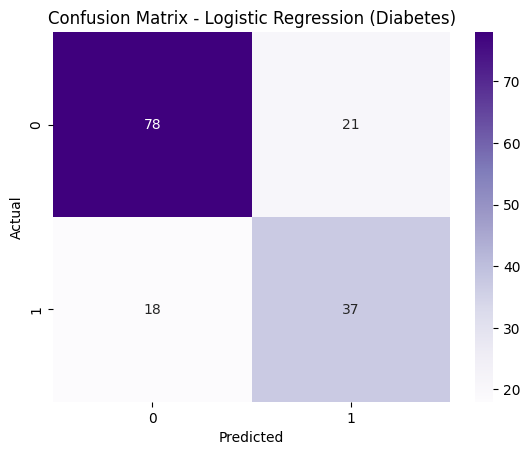

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")


X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

manual_accuracy = (TP + TN) / (TP + TN + FP + FN)
manual_precision = TP / (TP + FP)
manual_recall = TP / (TP + FN)
manual_f1 = 2 * (manual_precision * manual_recall) / (manual_precision + manual_recall)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("\nConfusion Matrix:\n", cm)
print(f"\nFrom sklearn metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"\nFrom manual formulas (using confusion matrix):")
print(f"Accuracy: {manual_accuracy:.4f}")
print(f"Precision: {manual_precision:.4f}")
print(f"Recall: {manual_recall:.4f}")
print(f"F1 Score: {manual_f1:.4f}")

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Diabetes)")
plt.show()